In [1]:
## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('./data.csv',encoding='unicode_escape')
# Reading the dataset

## Data Understanding

In [4]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(124214, 13)

In [6]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124214 entries, 0 to 124213
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     79498 non-null   object 
 1   sampling_date                124214 non-null  object 
 2   state                        124214 non-null  object 
 3   location                     124214 non-null  object 
 4   agency                       77966 non-null   object 
 5   type                         122585 non-null  object 
 6   so2                          110390 non-null  float64
 7   no2                          118775 non-null  float64
 8   rspm                         110683 non-null  float64
 9   spm                          62317 non-null   float64
 10  location_monitoring_station  115479 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         124213 non-null  object 
dtyp

In [7]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

,0
stn_code,44716
sampling_date,0
state,0
location,0
agency,46248
type,1629
so2,13824
no2,5439
rspm,13531
spm,61897


In [8]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,so2,no2,rspm,spm,pm2_5
count,110390.000000,118775.000000,110683.000000,62317.000000,4249.000000
mean,9.165944,21.838499,99.510889,211.332575,32.435232
std,8.521199,15.317399,63.694807,138.093404,25.360678
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,4.000000,13.000000,61.000000,126.000000,22.000000
50%,7.000000,18.000000,85.000000,186.000000,29.000000
75%,12.000000,26.200000,120.000000,268.000000,34.000000
max,228.000000,334.900000,1082.000000,2213.000000,318.000000


In [9]:
df.nunique()
# These are all the unique values present in the dataframe

,0
stn_code,210
sampling_date,5021
state,13
location,109
agency,22
type,10
so2,1181
no2,1665
rspm,1515
spm,2189


In [10]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code)
sampling_date (date of sample collection)
state (Indian State)
location (location of sample collection)
agency
type (type of area)
so2 (sulphur dioxide concentration)
no2 (nitrogen dioxide concentration)
rspm (respirable suspended particualte matter concentration)
spm (suspended particulate matter)
location_monitoring_station
pm2_5 (particulate matter 2.5)
date (date)

## Data Visualization

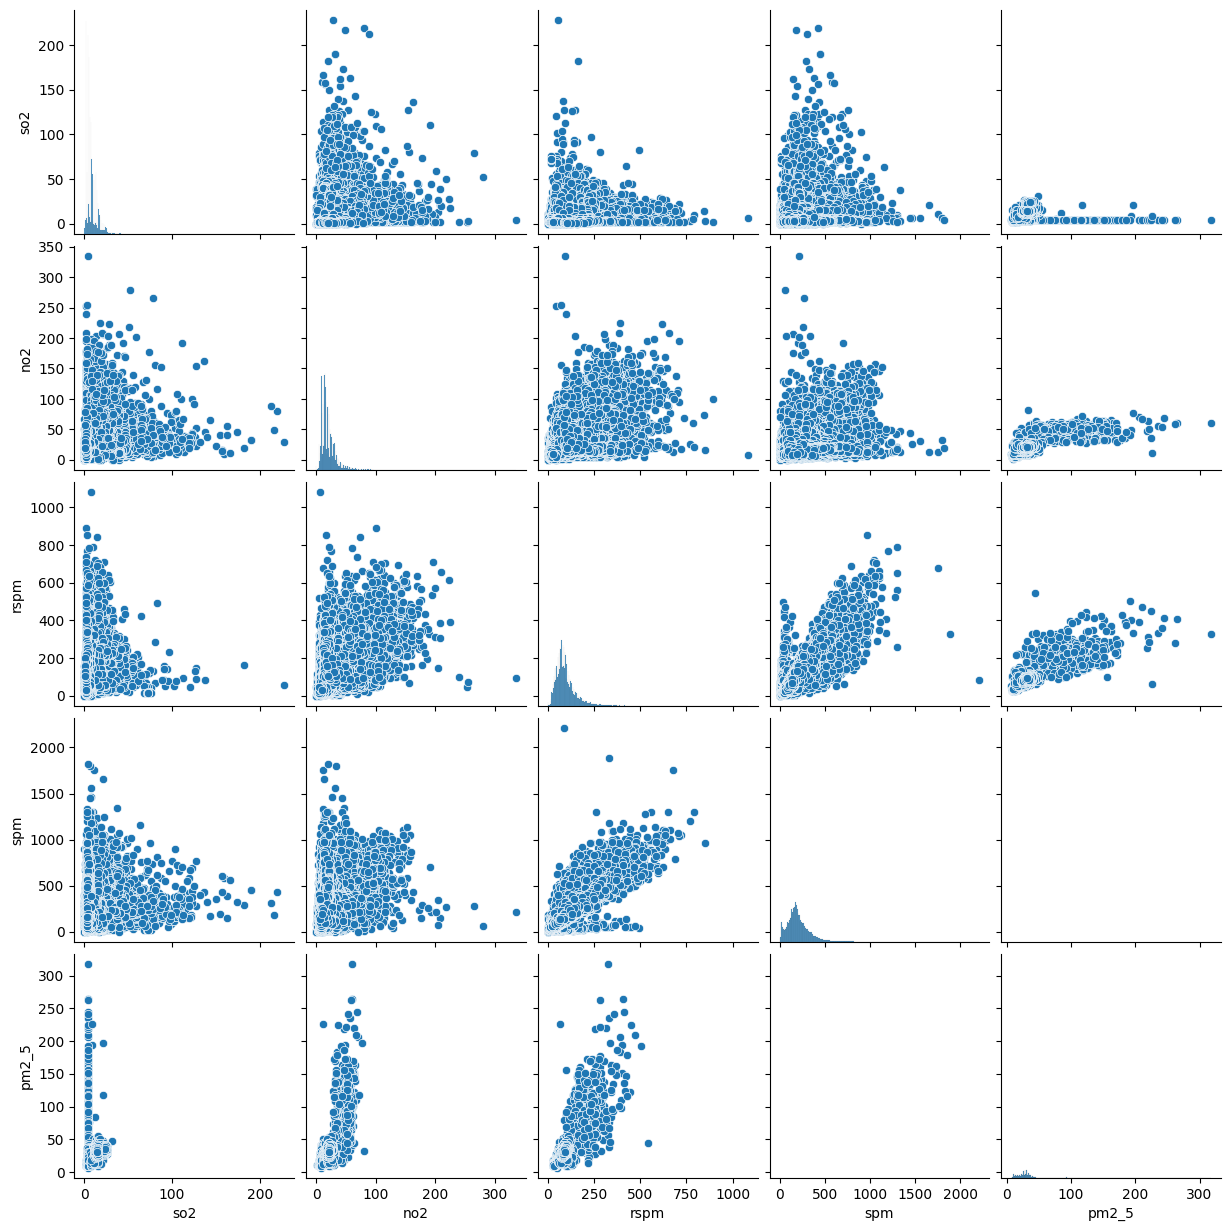

In [11]:
sns.pairplot(data=df)

In [12]:
df['state'].value_counts()
# Viewing the count of values present in the state column

,count
state,
Andhra Pradesh,26368
Gujarat,21279
Assam,19361
Himachal Pradesh,18897
Delhi,8551
Chandigarh,8520
Chhattisgarh,7831
Goa,6206
Haryana,3420


[]

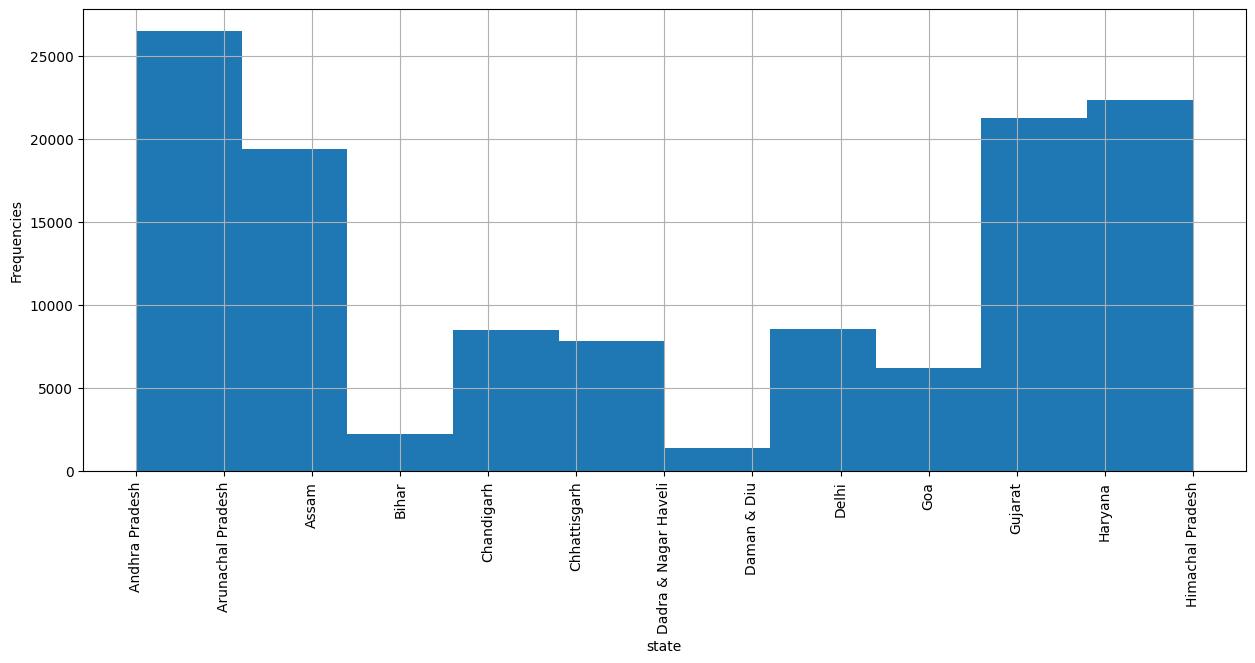

In [13]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [14]:
df['type'].value_counts()
# Viewing the count of values present in the type column

,count
type,
"Residential, Rural and other Areas",53887
Residential and others,29505
Industrial Area,20439
Industrial Areas,13338
Sensitive Area,2778
Sensitive Areas,1873
RIRUO,473
Sensitive,155
Residential,69


[]

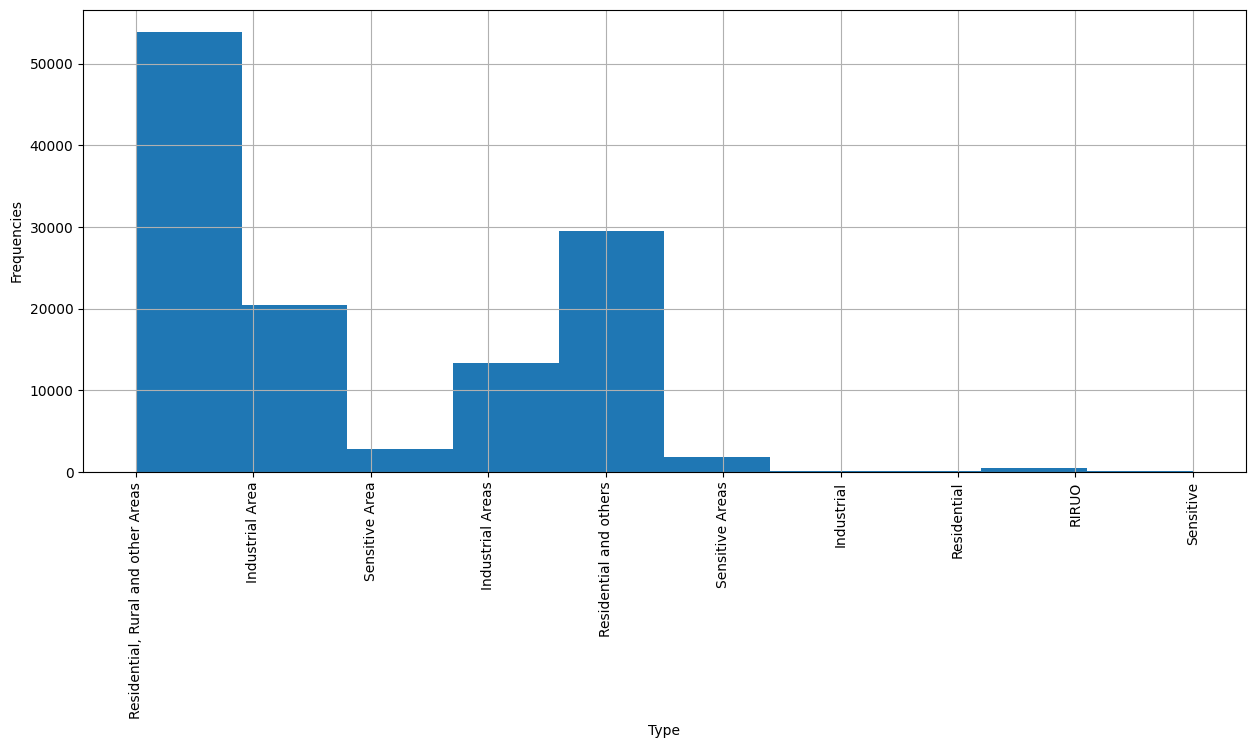

In [15]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [16]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

,count
agency,
Andhra Pradesh State Pollution Control Board,15691
Assam State Pollution Control Board,13427
Himachal Pradesh State Environment Proection & Pollution Control Board,11287
Gujarat State Pollution Control Board,8763
Goa State Pollution Control Board,5040
Chandigarh Pollution Control Committee,4614
Chattisgarh Environment Conservation Board,4051
Central Pollution Control Board,3604
National Environmental Engineering Research Institute,3243


[]

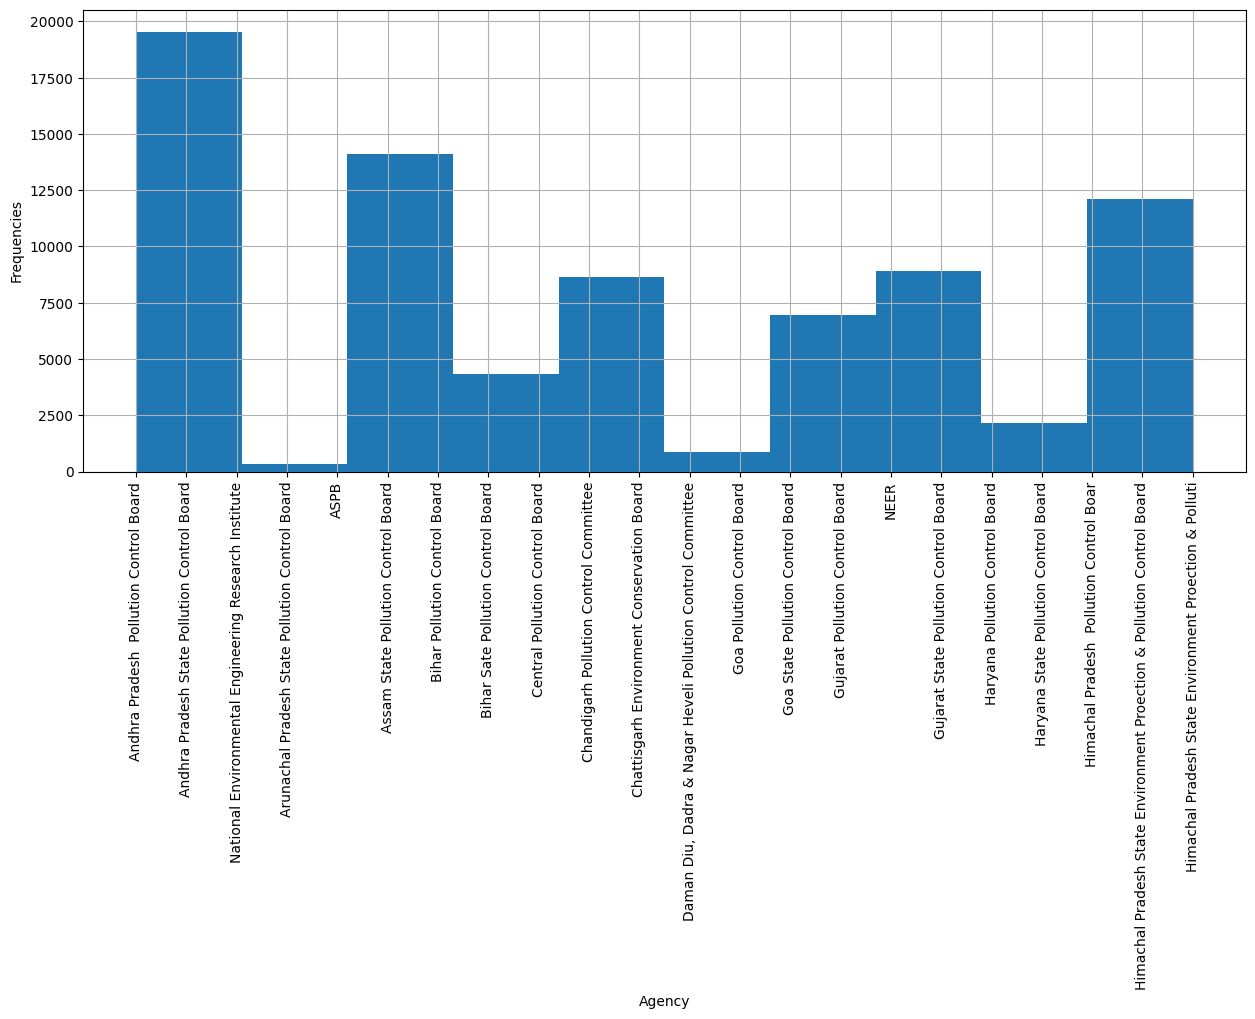

In [17]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

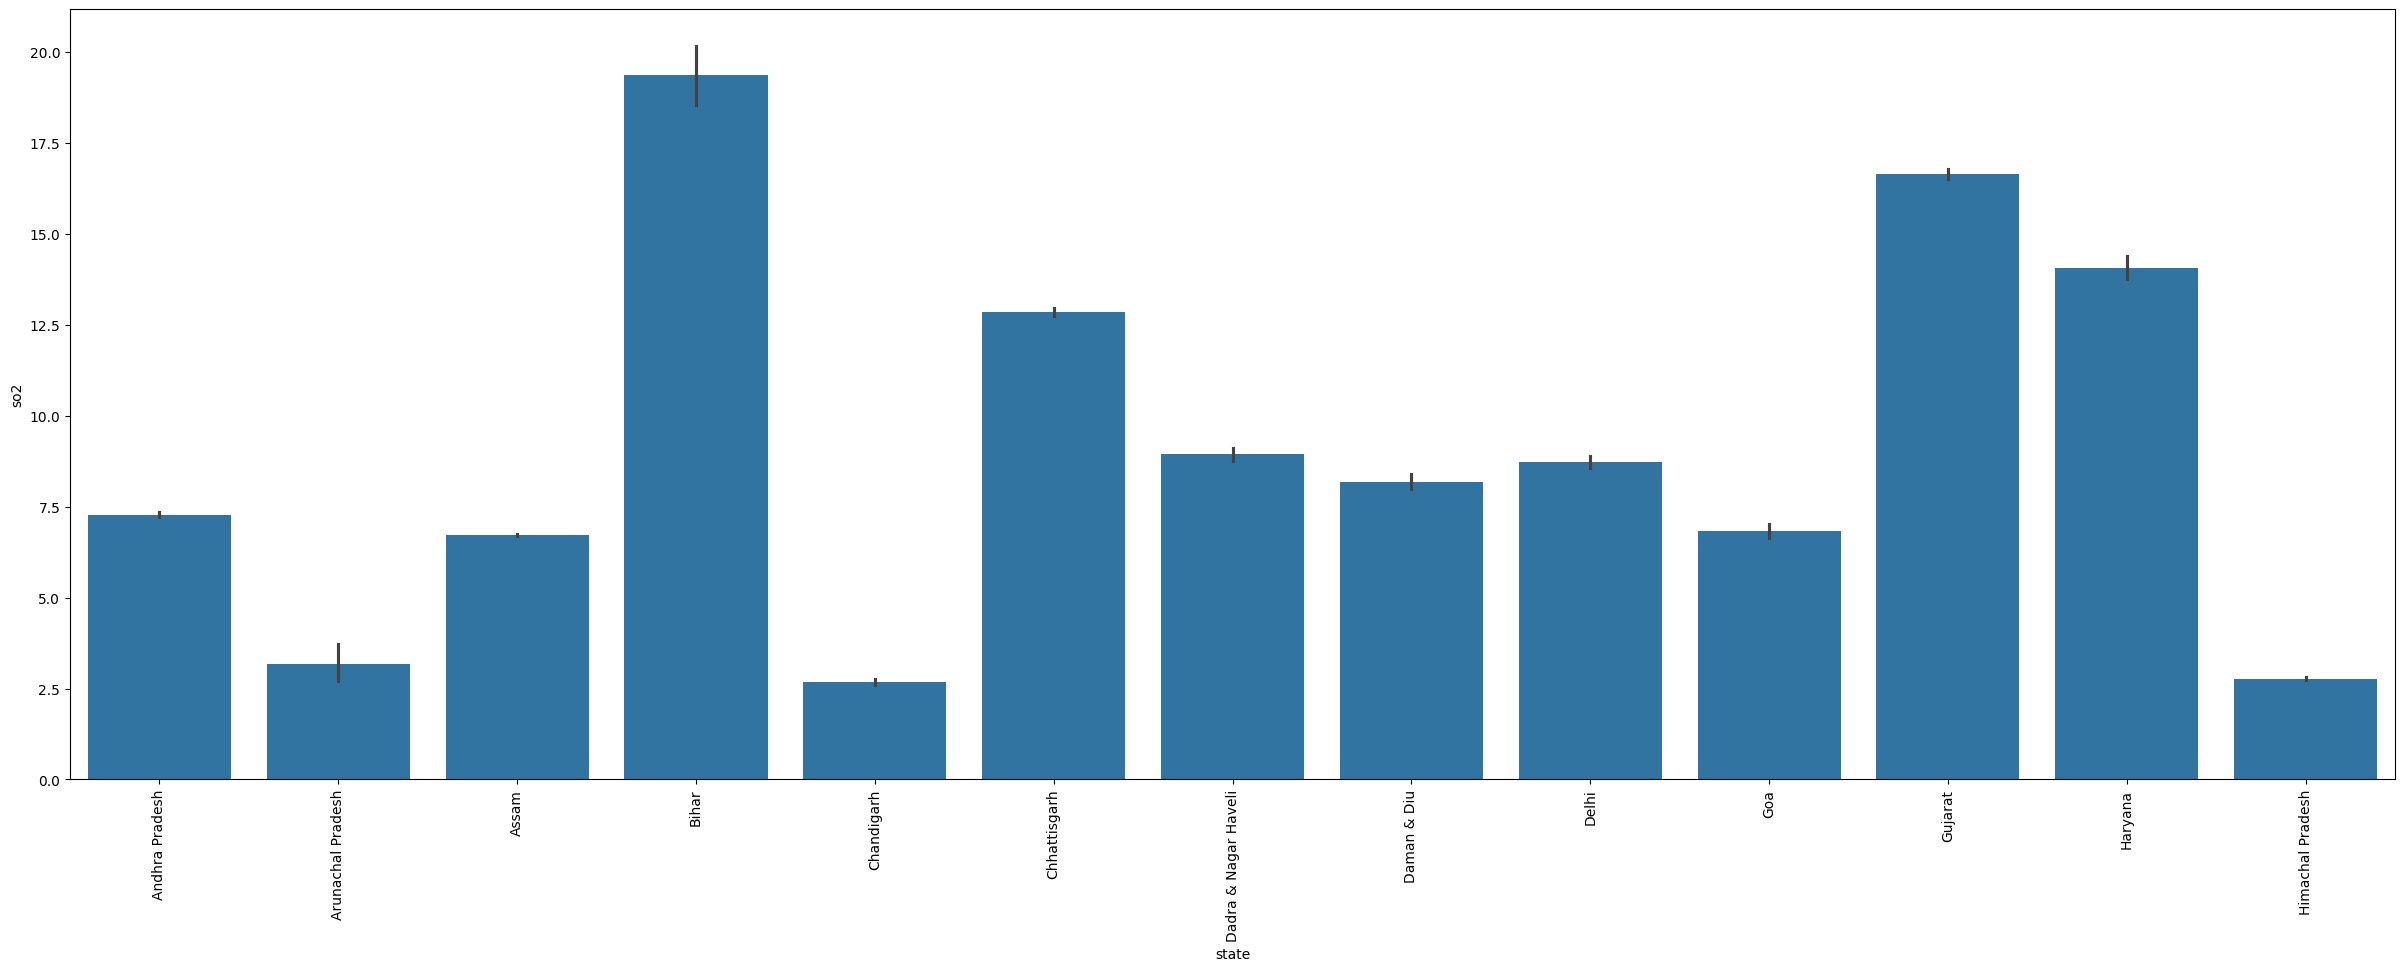

In [18]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [19]:
plt.rcParams['figure.figsize']=(30,10)

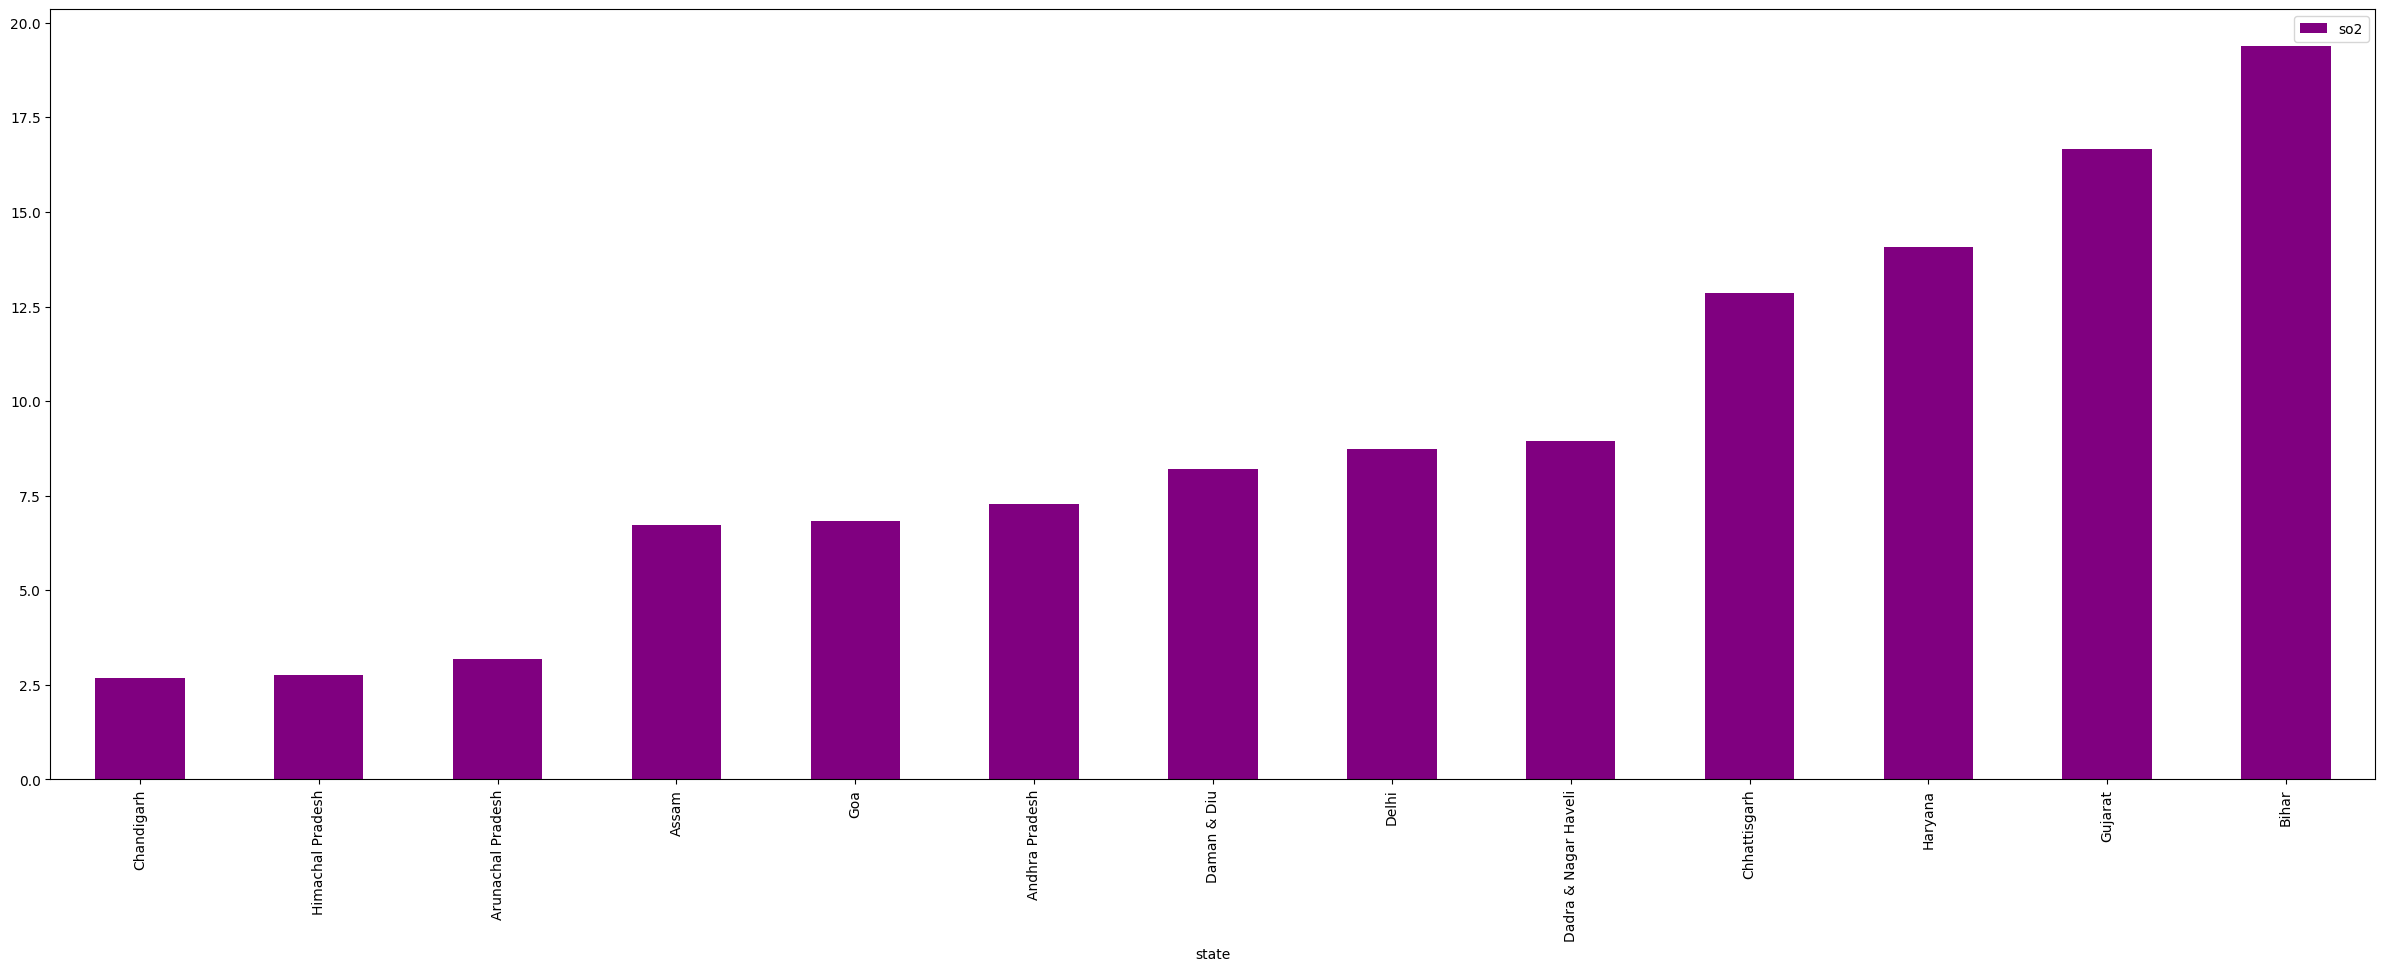

In [20]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

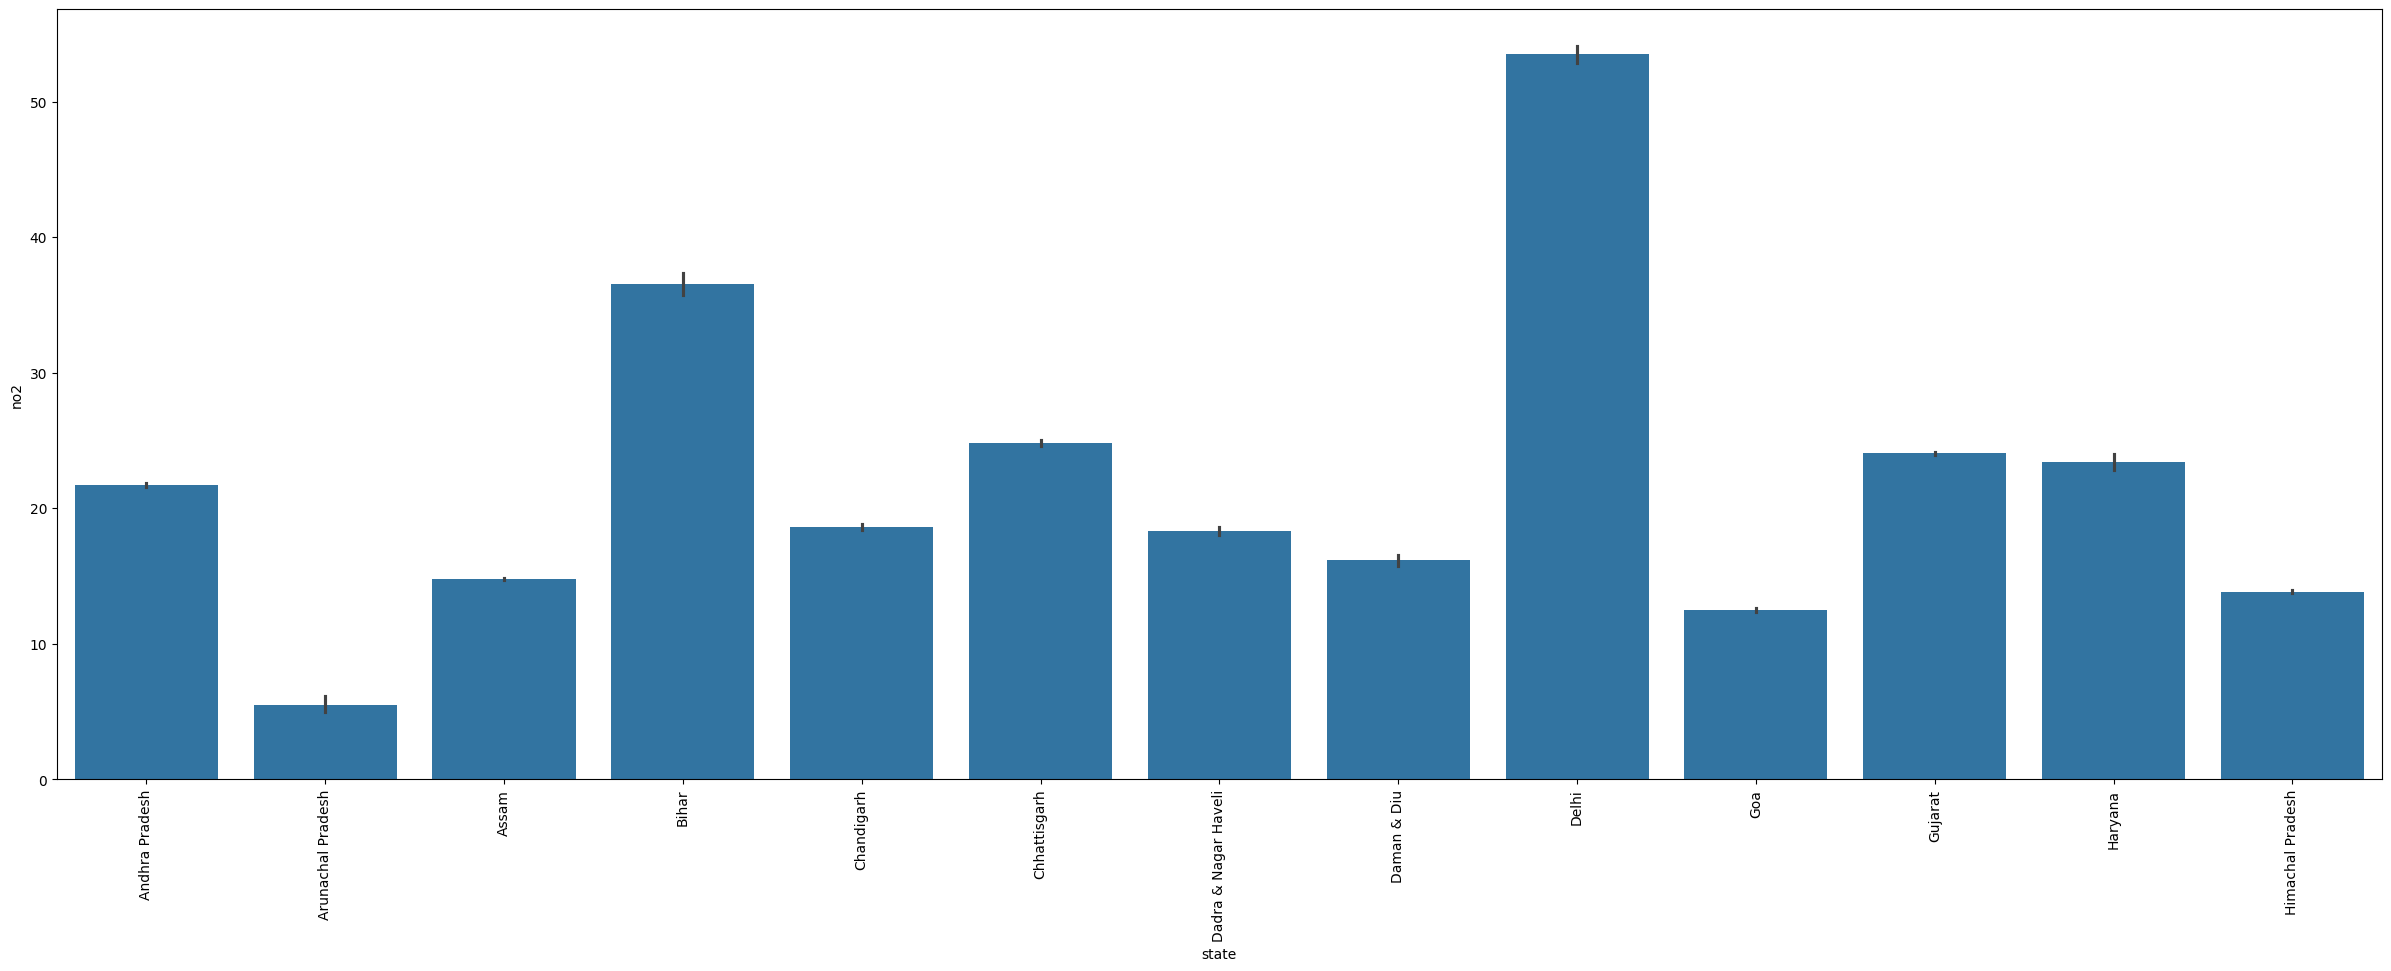

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states

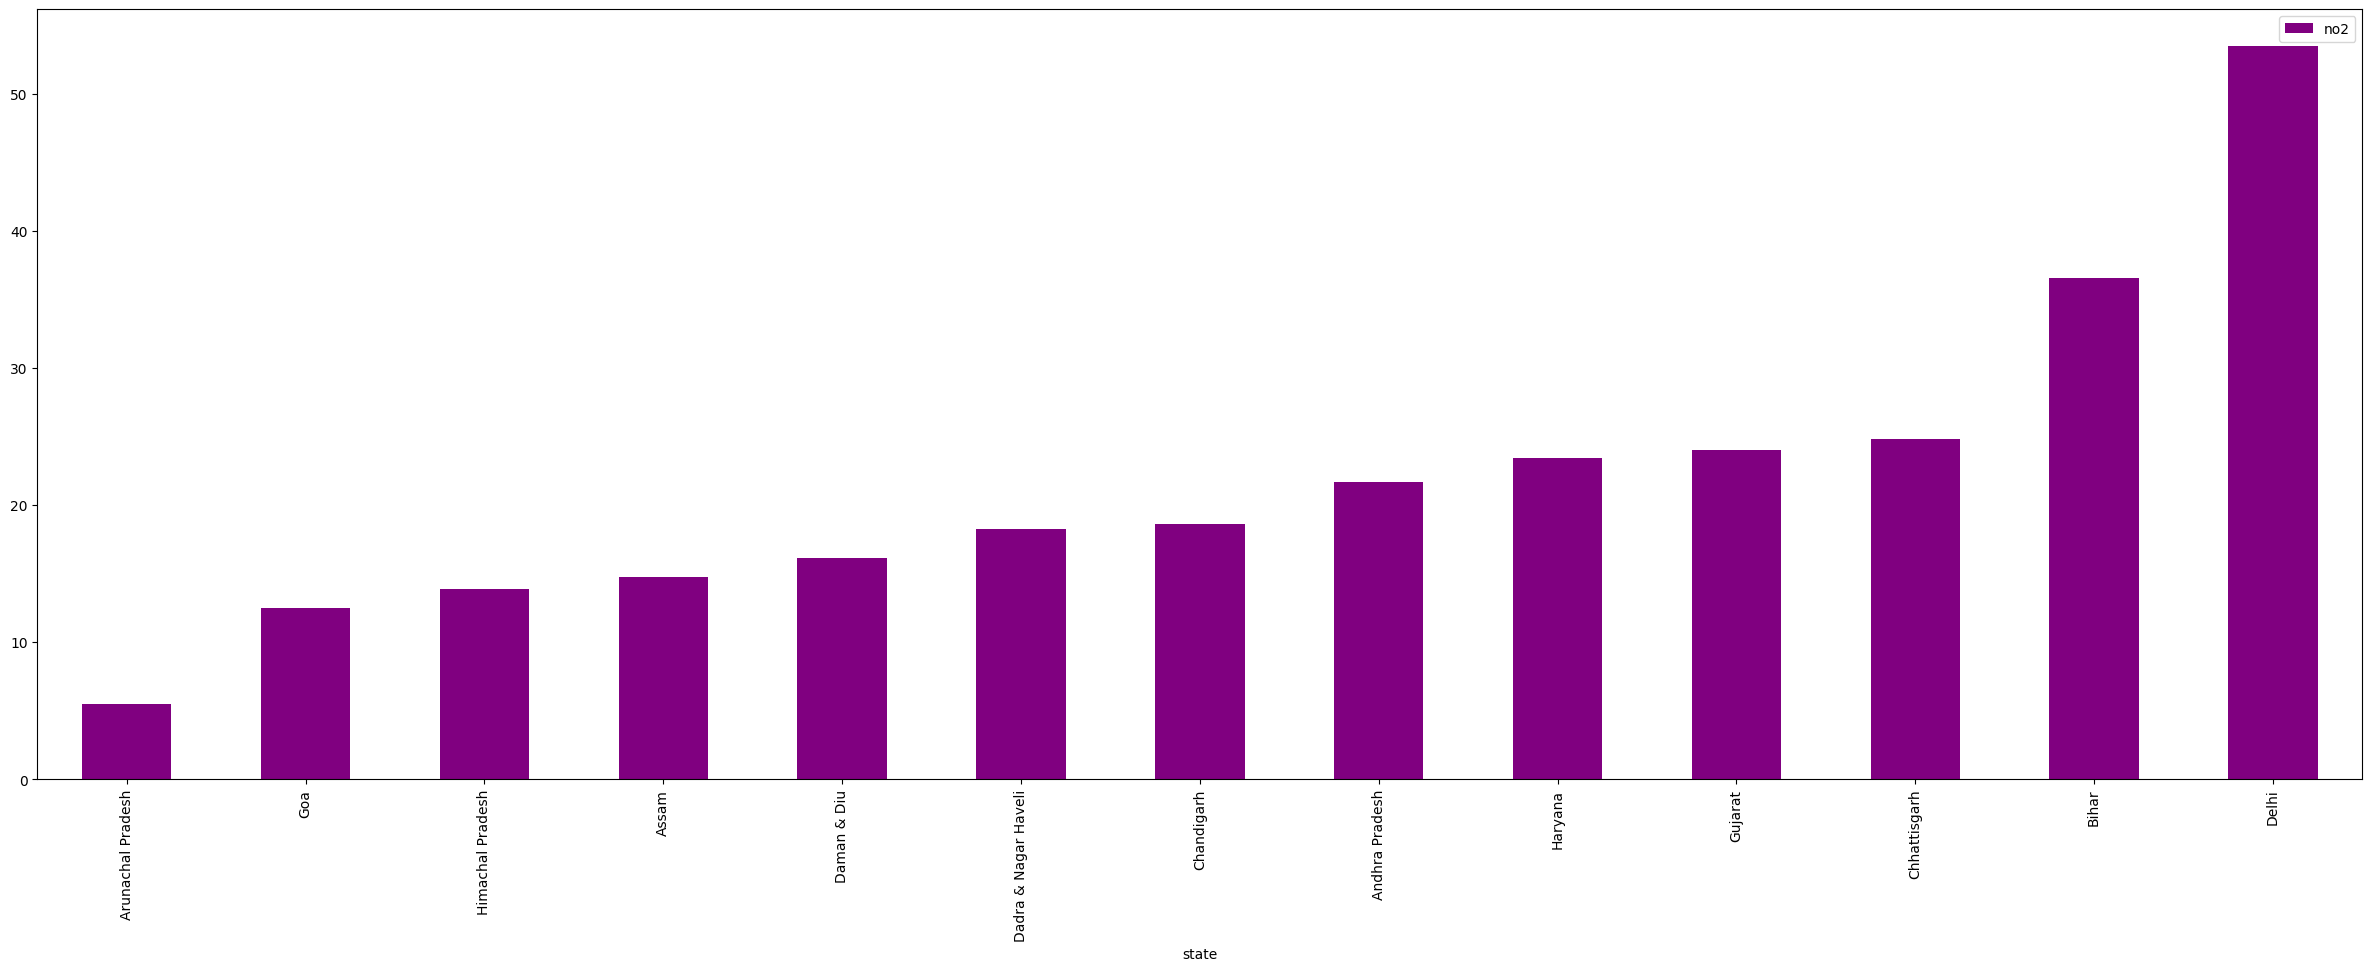

In [22]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

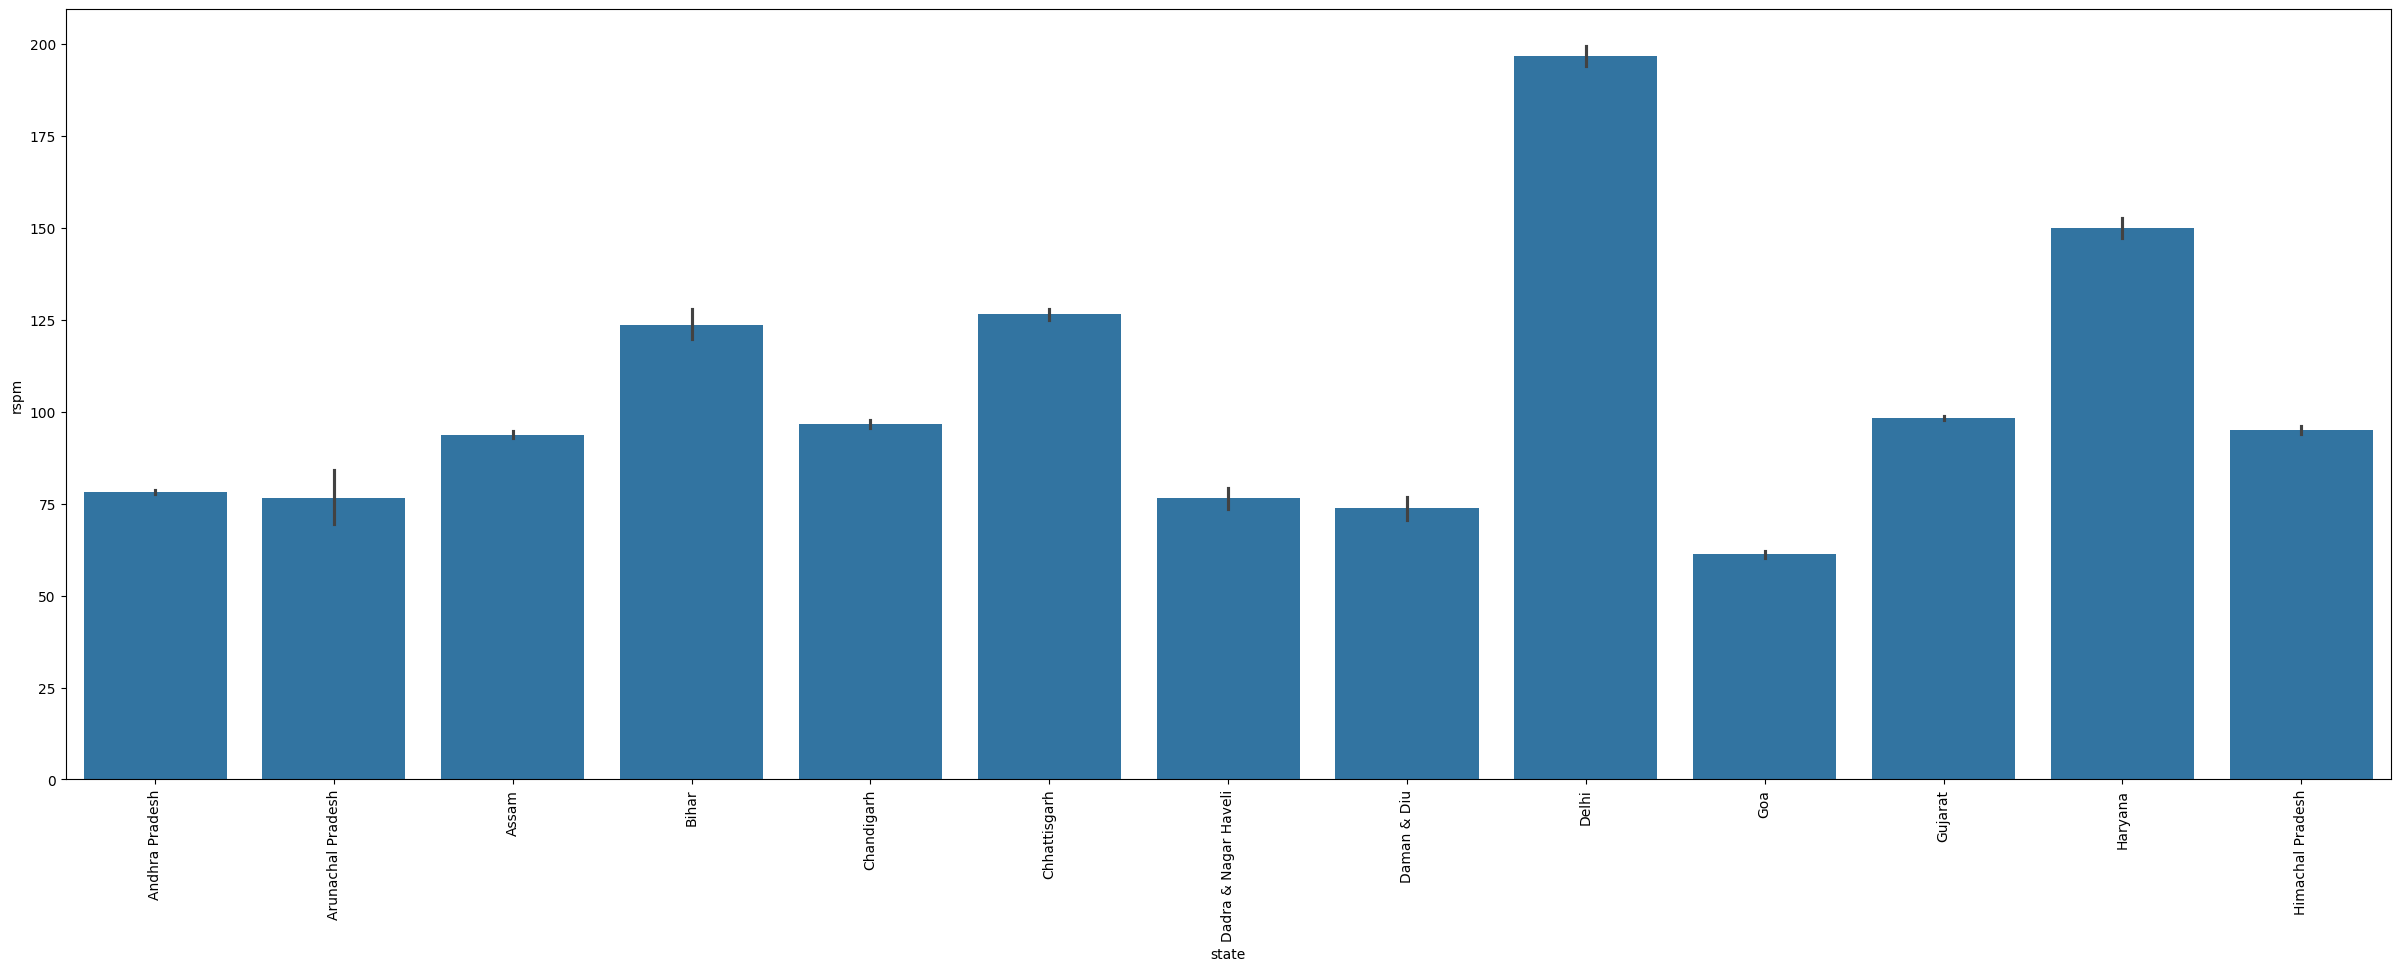

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

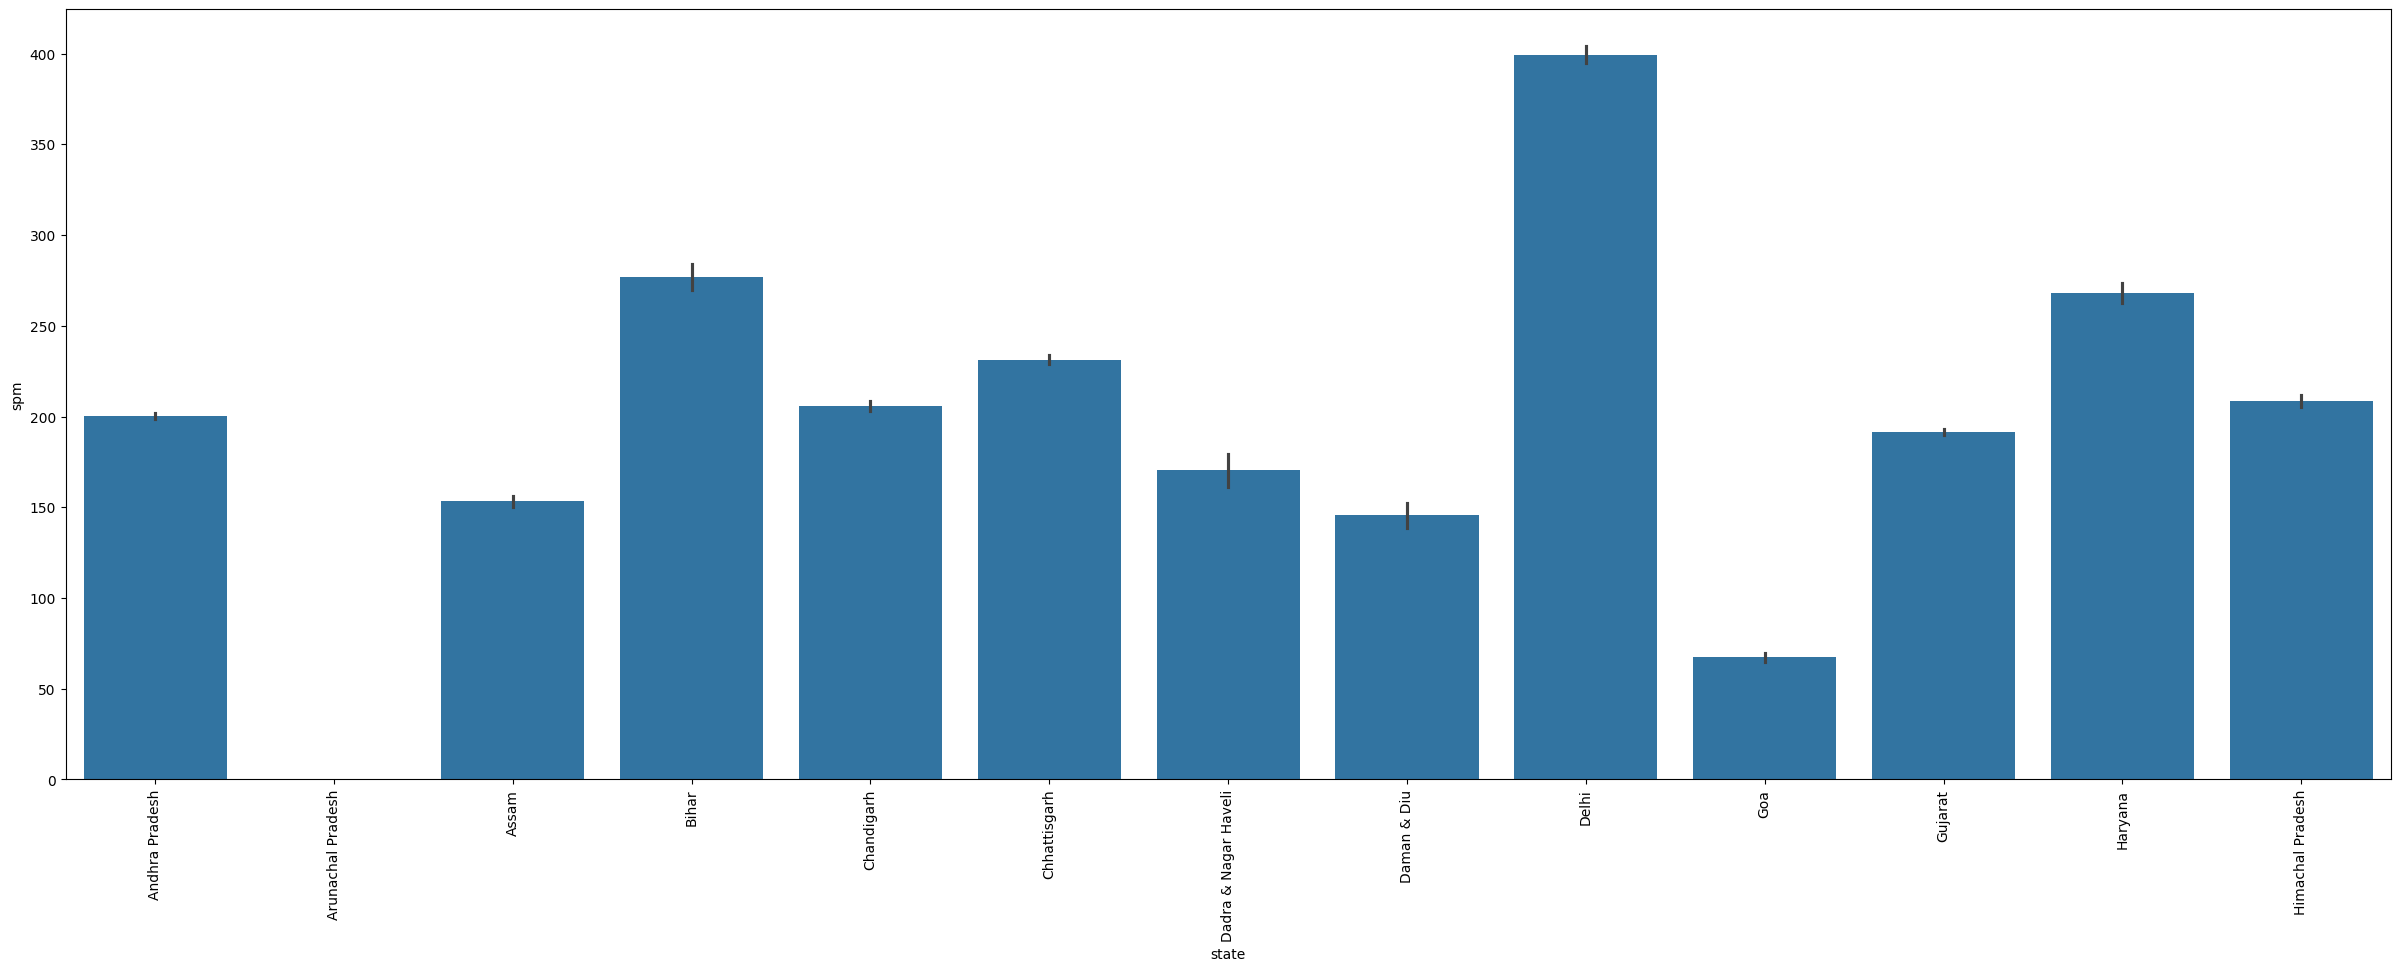

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

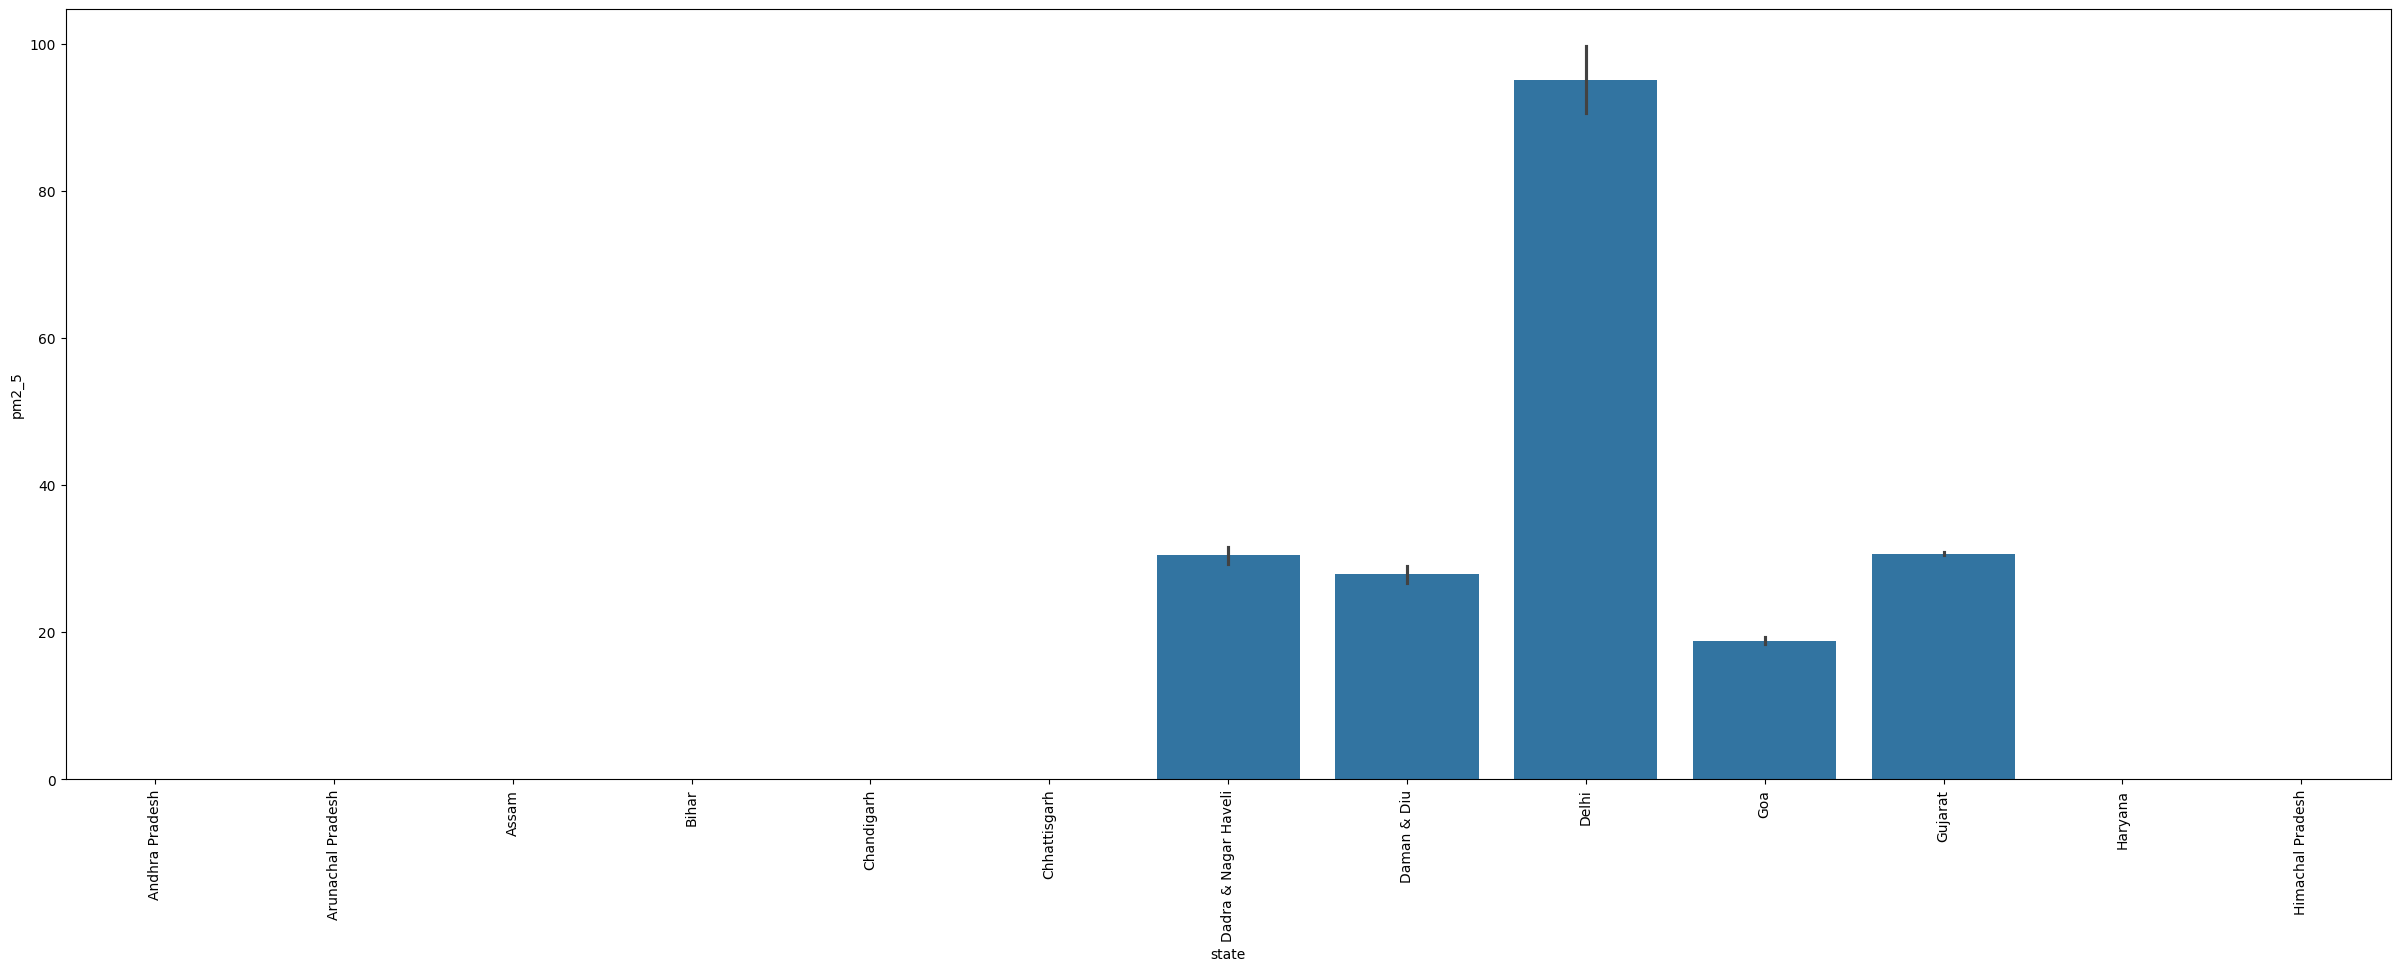

In [25]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states

### Checking all null values and treating those null values.

In [26]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [27]:
nullvalues
# higher null values present in pm2_5 followed by spm

,0
pm2_5,119965
spm,61897
agency,46248
stn_code,44716
so2,13824
rspm,13531
location_monitoring_station,8735
no2,5439
type,1629
date,1


In [28]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [29]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [30]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,119965,96.579291
spm,61897,49.830937
agency,46248,37.232518
stn_code,44716,35.999163
so2,13824,11.129180
rspm,13531,10.893297
location_monitoring_station,8735,7.032219
no2,5439,4.378733
type,1629,1.311446
date,1,0.000805


In [31]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [32]:
df.isnull().sum()
# Now checking the null values

,0
state,0
location,0
type,1629
so2,13824
no2,5439
rspm,13531
spm,61897
pm2_5,119965


In [33]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
124209,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,34.0,102.0,NaN,NaN
124210,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",2.0,24.0,115.0,NaN,NaN
124211,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,30.0,126.0,NaN,NaN
124212,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,20.0,104.0,NaN,NaN


In [34]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [35]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [36]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
pm2_5,0


In [37]:
df
# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
124209,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,34.0,102.0,0.0,0.0
124210,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",2.0,24.0,115.0,0.0,0.0
124211,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,30.0,126.0,0.0,0.0
124212,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,20.0,104.0,0.0,0.0


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

### Function to calculate so2 individual pollutant index(si)

In [38]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### Function to calculate no2 individual pollutant index(ni)

In [39]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### Function to calculate rspm individual pollutant index(rpi)

In [40]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [41]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### function to calculate the air quality index (AQI) of every data value

In [42]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [43]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [44]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

,count
AQI_Range,
Good,62623
Poor,34156
Unhealthy,10435
Moderate,9336
Hazardous,3941
Very unhealthy,3723


### Splitting the dataset into Dependent and Independent columns

In [45]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [46]:
Y.head()
# the AQI column is the target column

,AQI
0,21.750
1,8.750
2,35.625
3,18.375
4,9.375


In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(99371, 4) (24843, 4) (99371,) (24843,)


### Linear Regression

In [48]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [49]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [50]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  10.459242363105368
RMSE TestData =  10.603250743852957
--------------------------------------------------
RSquared value on train: 0.9903560412404843
RSquared value on test: 0.9899676512416122


### Decision Tree Regressor

In [51]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [52]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [53]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.1102022214041353e-13
RMSE TestData =  1.217675986019483
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.999867691410174


### Random Forest Regressor

In [54]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [55]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [56]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3305736640380017
RMSE TestData =  1.1543494545447082
--------------------------------------------------
RSquared value on train: 0.9999903663382373
RSquared value on test: 0.9998810952615016


# Classification Algorithms

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [59]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

### Logistic Regression

In [60]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7252442233517177
Model accuracy on test is:  0.7272328072015808
--------------------------------------------------
KappaScore is:  0.5667198359635449


In [61]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [62]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Moderate'], dtype=object)

In [63]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [64]:
log_reg.predict([[2,45.8,37,32]])

array(['Moderate'], dtype=object)

### Decision Tree Classifier

In [65]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999268132028982
--------------------------------------------------
KappaScore is:  0.9998880879582545


### Random Forest Classifier

In [66]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9997804396086946
--------------------------------------------------
KappaScore is:  0.9996642842406861


### K-Nearest Neighbours

In [67]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9980654386407604
Model accuracy on test is:  0.996682198531385
--------------------------------------------------
KappaScore is:  0.9949252933984866


In [68]:
KNN.predict([[7.4,47.7,78.182,100]])
# Predictions on random values

array(['Poor'], dtype=object)

In [69]:
KNN.predict([[1,1.2,3.12,0]])
# Predictions on random values

array(['Good'], dtype=object)

In [70]:
KNN.predict([[325.7,345,798.182,203]])
# Predictions on random values

array(['Unhealthy'], dtype=object)

### AGENT FUNCTION

High-density areas may experience more significant pollution due to the concentration of vehicles and human activities, making them a primary focus for pollution reduction efforts. This system employs embedded sensors strategically positioned across various locations to detect particle concentration and gather air quality data. Leveraging this comprehensive sensor network, the system dynamically adjusts traffic conditions in response to the obtained data. Utilizing the random forest classifier, renowned for its robust performance, the system accurately categorizes air quality levels, particularly in areas prone to heavy traffic-induced pollution. Subsequently, informed by these classifications, the system optimizes traffic signal timings, effectively minimizing vehicular congestion and facilitating smoother traffic flow. This proactive approach not only enhances urban mobility but also contributes to mitigating pollution levels associated with vehicular activity.

In [71]:
def getSensorData():
    #returns array of 4 values used to predict AQI range
    SOi = random.uniform(0.5, 400)  # Random float between 0 and 100
    Noi = random.uniform(0, 1200)  # Random float between 0 and 1000
    Rpi = random.uniform(0, 900)  # Random float between 0 and 10
    SPMi = random.uniform(0, 200)  # Random float between 0 and 100

    return SOi, Noi, Rpi, SPMi

The data from above is used to classify the AQI range into the following:
1. Good
2. Poor
3. Moderate
4. Unhealthy
5. Hazardous
6. Very unhealthy

In [73]:
import time
import random

# Assuming there are 10 locations that data comes from and needs to be manipulated to control traffic in these 5 locations
traffic_delay = [1] * 10
delay_time = 1200 # 120s of delay time at a regular traffic for each location

# Define a dictionary to map output values to integers
output_mapping = {
    "Good": 11,
    "Poor": 9,
    "Moderate": 7,
    "Unhealthy": 5,
    "Hazardous": 3,
    "Very unhealthy": 1
}

while True:
    # Continuous data sensing and prediction and modifying delay
    sensor_data_prediction = []
    for _ in range(10):
        output_pred = RF.predict([getSensorData()])
        sensor_data_prediction.append(output_mapping[output_pred[0]])
    # print(sensor_data_prediction)


    # Modify delay based on predicted data
    sensor_data_prediction = [x / sum(sensor_data_prediction) for x in sensor_data_prediction]
    traffic_delay = [x * delay_time for x in sensor_data_prediction]
    print("Modified time delay for each location: ", [f"{x:.3f}" for x in traffic_delay])

    time.sleep(5)

Modified time delay for each location:  ['163.636', '90.909', '90.909', '163.636', '163.636', '163.636', '90.909', '90.909', '90.909', '90.909']
Modified time delay for each location:  ['103.448', '103.448', '103.448', '103.448', '103.448', '186.207', '103.448', '103.448', '103.448', '186.207']
Modified time delay for each location:  ['103.448', '103.448', '103.448', '103.448', '103.448', '186.207', '103.448', '103.448', '186.207', '103.448']
Modified time delay for each location:  ['186.207', '103.448', '103.448', '103.448', '186.207', '103.448', '103.448', '103.448', '103.448', '103.448']
Modified time delay for each location:  ['103.448', '144.828', '103.448', '227.586', '103.448', '103.448', '103.448', '103.448', '103.448', '103.448']
Modified time delay for each location:  ['120.000', '120.000', '120.000', '120.000', '120.000', '120.000', '120.000', '120.000', '120.000', '120.000']
Modified time delay for each location:  ['111.111', '111.111', '111.111', '111.111', '200.000', '111

KeyboardInterrupt: 

### WHAT MORE CAN BE DONE?

This agent and the model can be then incorporated with GPS system and addtional models can be trained to have much more efficient vehicle flow and control over traffic. Additionally, more parameters can be taken into considerations such as vechicle speed, type, pedestrians and other data to have a much more detailed dataset that would improve the efficiency of the agent as it would handle pollution control in more environment specific ways such as taking extra measures to keep the pollution levels low near areas such as schools, hospitals etc. Additionally, the agent may interact with other systems or agencies responsible for implementing policies aimed at reducing pollution, such as vehicle emissions standards or urban planning regulations. By giving control over traffic signals that agent can also be made to track traffic congestion levels and aim to minimize delays caused by traffic signals adjustments.

In essence, the Air Quality Monitoring Agent operates within a dynamic environment where it seeks to balance the reduction of pollution with the efficient movement of traffic. By continuously monitoring and analyzing data from various sensors, it can intelligently adjust traffic signals to achieve its performance goals while adapting to changing environmental conditions.